# Machine Learning
In this module we will see a bit about machine learning and how it can be applied to geosciences.

Machine learning is a branch of artificial intelligence (AI) focused on building applications that learn from data and improve their accuracy over time without being programmed to do so. In machine learning, algorithms use statistical techniques to give computers the ability to "learn" with incoming data and make decisions based on that data. Machine learning is used in a range of computing tasks where designing and programming explicit, rule-based algorithms is infeasible, such as in email filtering, detection of network intruders, and computer vision. The core of machine learning deals with representation and generalization—representing data in a form that machines can learn from so that they can make generalizations or predictions about future data.

Machine learning can be used for countless different applications in geosciences and elsewhere. Problems that can be tackled by Machine Learning include classification, clustering and regression.
- Classification: We know what labels exist and we want to know where our data fits
- Clustering: We are not too sure about labels, but we want to see how our data is grouped
- Regression: Given the data that we have, what responses should we expect if the inputs were different?


In this module, we will explore the application of machine learning algorithms, specifically the Random Forest algorithm, to categorize the tectonic setting of igneous rocks based on their geochemical composition. The Random Forest is an ensemble learning method known for its accuracy and ability to handle large datasets with multiple variables. We'll use it to analyze and learn from the geochemical signatures of rocks to predict their geological formation environment. This approach will allow us to understand how different elements and compounds present in the rocks correlate with various tectonic settings.


References for this module:

[Scikit-learn](https://scikit-learn.org/stable/index.html)

Takaew et al. 2023 ***Machine learning and tectonic setting determination: Bridging the gap between Earth scientists and data scientists*** https://doi.org/10.1016/j.gsf.2023.101726


Doucet et al. 2022 ***Geochemical fingerprinting of continental and oceanic basalts: A machine learning approach*** https://doi.org/10.1016/j.earscirev.2022.104192




In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [ ]:
# First we load the geochemical data, stored as a "parquet" file and create a dataframe
df = pd.read_parquet("https://github.com/pierosampaio/PythonWorkshop/raw/main/Files/training_dataset2.2.parquet",engine="auto")
df = df.reset_index()

In [ ]:
#We explore the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48615 entries, 0 to 48614
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   index             48615 non-null  int64   
 1   sample_id         28254 non-null  object  
 2   references        48615 non-null  object  
 3   latitude          48615 non-null  float64 
 4   longitude         48615 non-null  float64 
 5   tectonic_setting  48615 non-null  object  
 6   rock_name         48615 non-null  object  
 7   sio2              39785 non-null  float64 
 8   tio2              39227 non-null  float64 
 9   al2o3             39114 non-null  float64 
 10  cr2o3             2095 non-null   float64 
 11  feot              33847 non-null  float64 
 12  nio               1047 non-null   float64 
 13  mno               35533 non-null  float64 
 14  mgo               39288 non-null  float64 
 15  cao               39202 non-null  float64 
 16  na2o              3920

In [ ]:
# Install PyGMT in this environnement
# Not trick to learn here :-)
%%capture
!sudo apt update
!sudo apt upgrade -y
!sudo apt install -y build-essential cmake libcurl4-gnutls-dev libnetcdf-dev gdal-bin libgdal-dev libfftw3-dev libpcre3-dev liblapack-dev libblas-dev libglib2.0-dev ghostscript ghostscript-x graphicsmagick ffmpeg xdg-utils
# clone gmt from source
!git clone --depth 50 https://github.com/GenericMappingTools/gmt
# cmake everything
!cmake /content/gmt
# build and install
!cmake --build . --target install



In [ ]:
!which gmt

/usr/local/bin/gmt


In [ ]:
%%capture
!pip install pygmt

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!mamba install -q pygmt

✨🍰✨ Everything looks OK!


In [ ]:
import pygmt
pygmt.__version__

'v0.10.0'

<ipython-input-15-786c8a9dba8e>:34: FutureWarning: The 'color' parameter has been deprecated since v0.8.0 and will be removed in v0.12.0. Please use 'fill' instead.
  fig.plot(


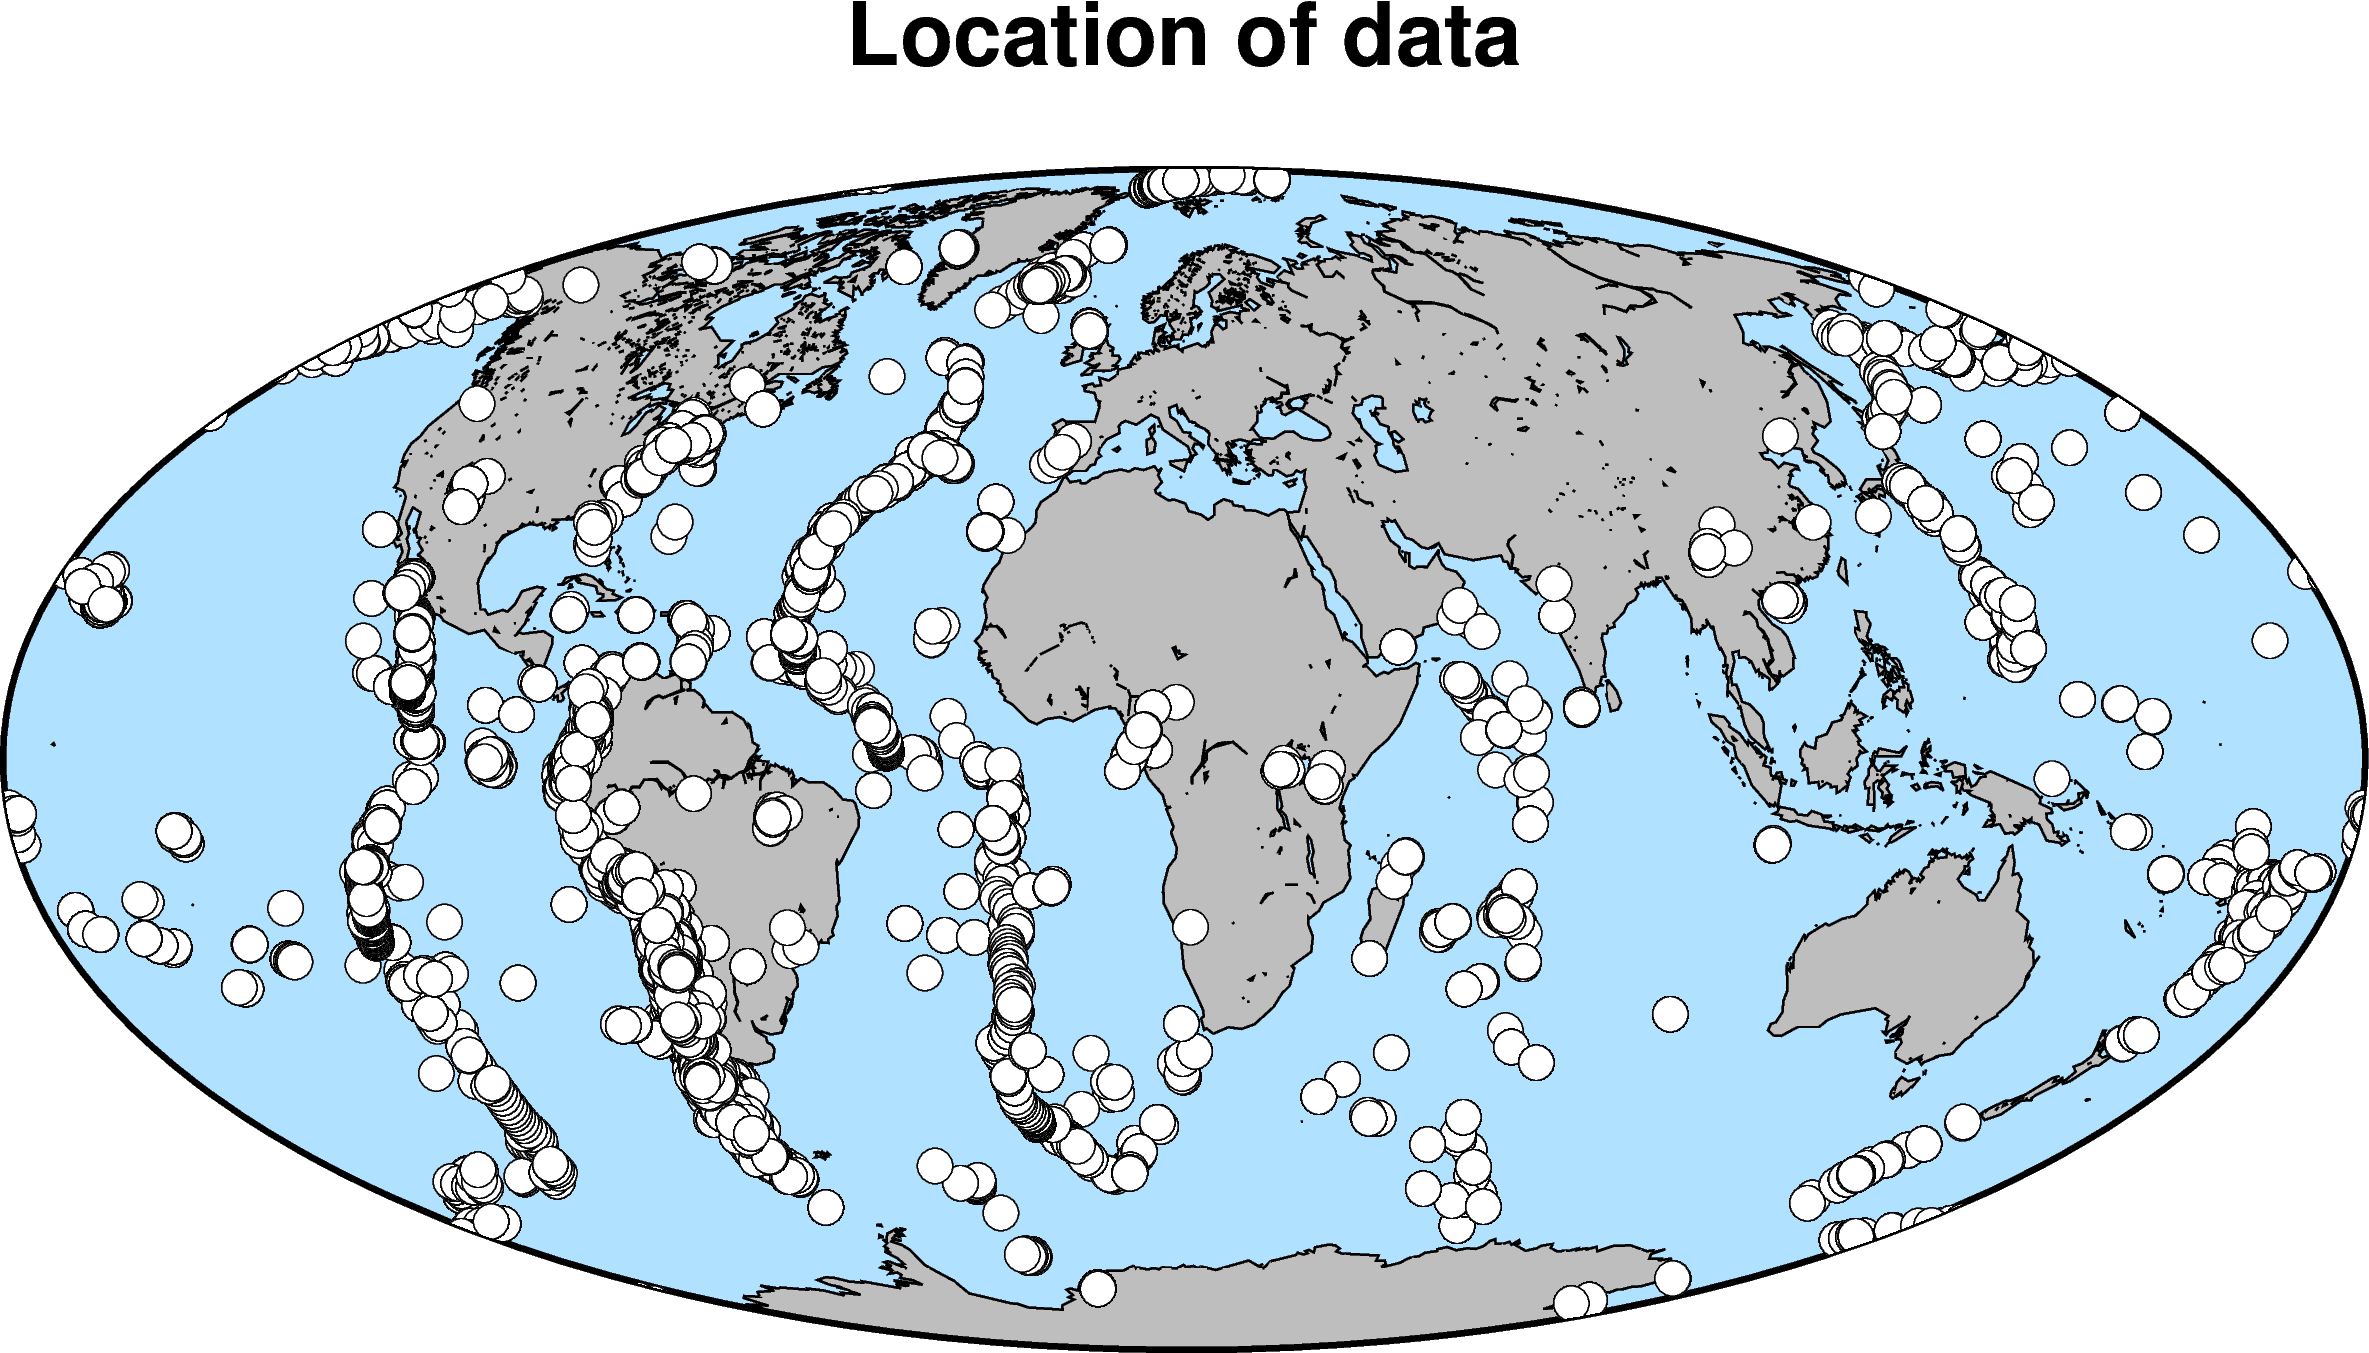

In [ ]:
# Import the required PyGMT module
import pygmt

# Start by creating a new figure instance which will be the canvas for plotting.
fig = pygmt.Figure()

# Plot the coastlines and other geographical features onto the figure.
# We'll use the `coast` method which draws coastlines, filled continents, and political boundaries on maps.
fig.coast(
    # Define the projection of the map. Here, "W15/20c" refers to the Mollweide projection
    # which is an equal-area projection. Centered at 15 degrees longitude and the map will be 20 cm wide.
    projection="W15/20c",
    #"W" refers to the Mollweide projection, an equal-area pseudocylindrical projection.
    #"15" sets the central meridian of the projection to 15 degrees longitude.
    #"20c" specifies the width of the map to be 20 centimeters.

    # Set the region to be displayed. "d" stands for the whole earth (global domain).
    region = "d",

    # Define the frame of the map. "Wstr" puts annotated tickmarks on the west side of the map,
    # and "+tFirst PyGMT Figure" adds the title "First PyGMT Figure" to the top of the map.
    frame=["Wstr+tLocation of data"],

    # Set the color of the land areas to "gray".
    land="gray",

    # Set the color of the water bodies to "lightskyblue1".
    water="lightskyblue1",

    # Define the appearance of shorelines. "0.5p,black" means they'll be drawn with a 0.5 point width and black color.
    shorelines="0.5p,black"
)

fig.plot(
    # Define the x-coordinates of the points using the "LONGITUDE" column of the MORB dataframe.
    x=df["longitude"],

    # Define the y-coordinates of the points using the "LATITUDE" column of the MORB dataframe.
    y=df["latitude"],

    # Set the style of the points.
    # "c0.3c" specifies that the points will be represented as circles with a diameter of 0.3 centimeters.
    style="c0.3c",
    # - "c" denotes that the symbol used for plotting will be a circle.
    # - "0.3" is the size of the circle.
    # - The second "c" indicates that the size is given in centimeters.
    color="white",
    # color of the circle
    pen="black"
    #color of edge
)

# Display the figure with the plotted points.
fig.show()

In [ ]:
print(df['level1'].unique())

['ocean', 'continent']
Categories (2, object): ['continent', 'ocean']


In [ ]:
print(df['level2'].unique())

['arcspreading', 'withinplate', 'arc', 'spreading']
Categories (4, object): ['arc', 'arcspreading', 'spreading', 'withinplate']


In [ ]:
print(df['level3'].unique())

['bab', 'ca', 'cf', 'cr', 'ia', 'ioa', 'mor', 'oi', 'op']
Categories (9, object): ['bab', 'ca', 'cf', 'cr', ..., 'ioa', 'mor', 'oi', 'op']


In [ ]:
# Now let's define the mappings as given.
level3_mapping = {
    "bab": "Back arc basins",
    "ca": "Continental arcs",
    "cf": "Continental floods",
    "cr": "Continental rifts",
    "ia": "Island arcs",
    "ioa": "Intra-oceanic arcs",
    "mor": "Mid-ocean ridges",
    "oi": "Ocean Islands",
    "op": "Oceanic plateaus"
}

level2_mapping = {
    "arcspreading": "Back arc",
    "withinplate": "Within plate",
    "arc": "Arc",
    "spreading": "Spreading"
}

level1_mapping = {
    "ocean": "Ocean",
    "continent": "Continent"
}

# Perform the replacement using the mappings.
df["level3"] = df["level3"].map(level3_mapping)
df["level2"] = df["level2"].map(level2_mapping)
df["level1"] = df["level1"].map(level1_mapping)

print(df['level3'].unique())

['Back arc basins', 'Continental arcs', 'Continental floods', 'Continental rifts', 'Island arcs', 'Intra-oceanic arcs', 'Mid-ocean ridges', 'Ocean Islands', 'Oceanic plateaus']
Categories (9, object): ['Back arc basins', 'Continental arcs', 'Continental floods',
                         'Continental rifts', ..., 'Intra-oceanic arcs', 'Mid-ocean ridges',
                         'Ocean Islands', 'Oceanic plateaus']


The samples have been classified according to various tectonic settings as following in the figure below

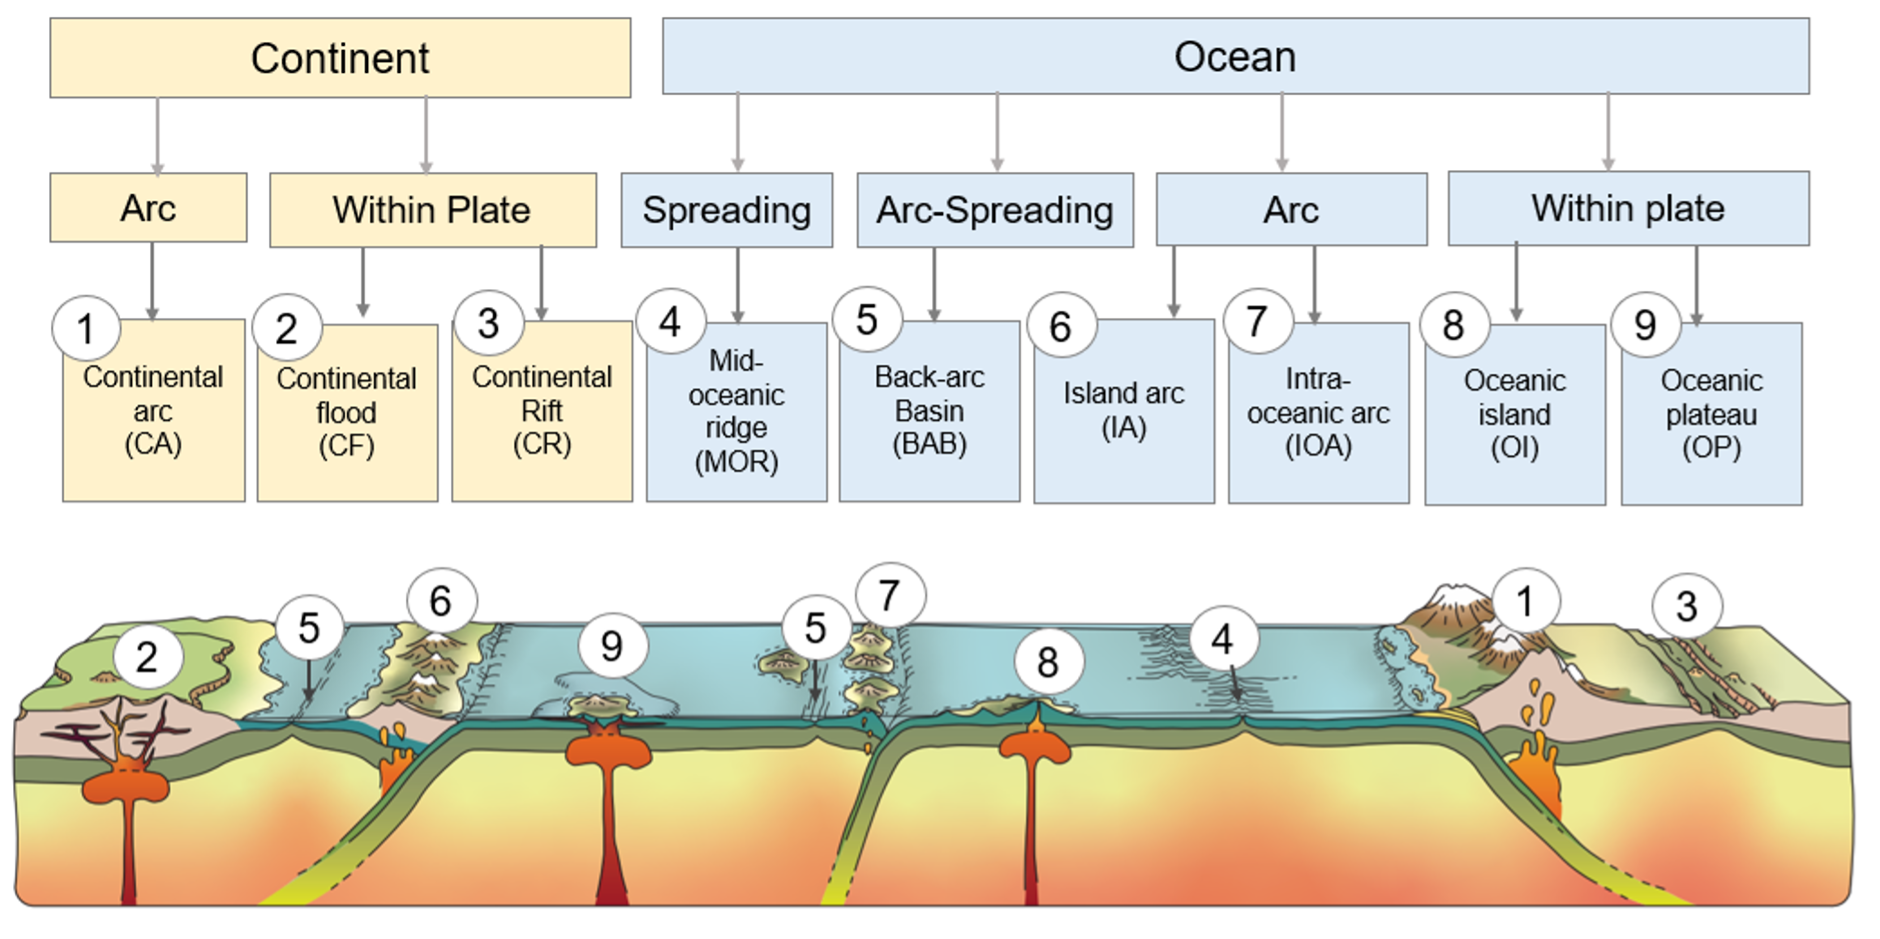

Let's plot the data on a TAS diagram and see their distribution

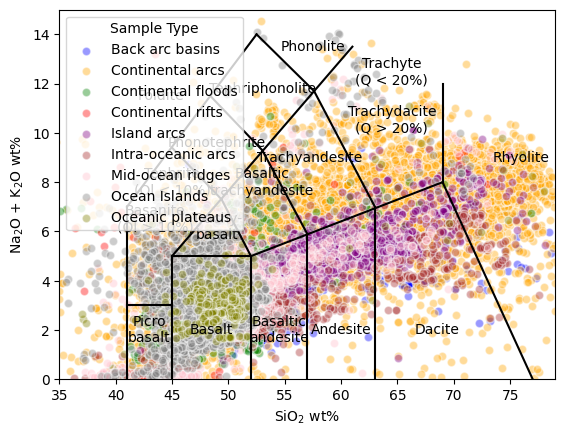

In [ ]:
#Plot the data into TAS diagram
# Create a new column for Na2O + K2O
df['TA'] = df['na2o'] + df['k2o']
# Define the TAS lines and labels
TAS_lines = [
    ([41, 41], [0, 7]),
    ([41, 52.5], [7, 14]),
    ([45, 45], [0, 5]),
    ([41, 45], [3, 3]),
    ([45, 61], [5, 13.5]),
    ([45, 52], [5, 5]),
    ([52, 69], [5, 8]),
    ([49.4, 52], [7.3, 5]),
    ([52, 52], [5, 0]),
    ([48.4, 53], [11.5, 9.3]),
    ([53, 57], [9.3, 5.9]),
    ([57, 57], [5.9, 0]),
    ([52.5, 57.6], [14, 11.7]),
    ([57.6, 63], [11.7, 7]),
    ([63, 63], [7, 0]),
    ([69, 69], [12, 8]),
    ([45, 49.4], [9.4, 7.3]),
    ([69, 77], [8, 0])
]

TAS_labels = [
    ('Picro\nbasalt', 43, 2),
    ('Basalt', 48.5, 2),
    ('Basaltic\nandesite', 54.5, 2),
    ('Andesite', 60, 2),
    ('Dacite', 68.5, 2),
    ('Rhyolite', 76, 9),
    ('Trachyte\n(Q < 20%)\n\nTrachydacite\n(Q > 20%)', 64.5, 11.5),
    ('Basaltic\ntrachyandesite', 53, 8),
    ('Trachy-\nbasalt', 49, 6.2),
    ('Trachyandesite', 57.2, 9),
    ('Phonotephrite', 49, 9.6),
    ('Tephriphonolite', 53.0, 11.8),
    ('Phonolite', 57.5, 13.5),
    ('Tephrite\n(Ol < 10%)', 45, 8),
    ('Foidite', 44, 11.5),
    ('Basanite\n(Ol > 10%)', 43.5, 6.5)
]

import matplotlib.pyplot as plt

# Create figure and axes
fig, ax = plt.subplots()

# Set the x-axis and y-axis labels with '2' as a subscript
ax.set_xlabel('SiO$_2$ wt%')
ax.set_ylabel('Na$_2$O + K$_2$O wt%')

# Set the axes limits
ax.set_xlim([35, 79])
ax.set_ylim([0, 15])

# Add TAS lines and labels to the plot
for line in TAS_lines:
    ax.plot(line[0], line[1], color='black')

for label in TAS_labels:
    text = ax.text(label[1], label[2], label[0], ha='center', va='center', color='black')

color_map = {
    'Back arc basins': 'blue',
    'Continental arcs': 'orange',
    'Continental floods': 'green',
    'Continental rifts': 'red',
    'Island arcs': 'purple',
    'Intra-oceanic arcs': 'brown',
    'Mid-ocean ridges': 'pink',
    'Ocean Islands': 'grey',
    'Oceanic plateaus': 'olive'
}

for level3_type in df['level3'].unique():
    ix = df['level3'] == level3_type
    ax.scatter(df['sio2'][ix], df['TA'][ix], c=color_map[level3_type], label=level3_type, alpha=0.4, edgecolors='white')

ax.legend(title='Sample Type')

plt.show()

# Data sparsity
Data sparsity is a prevalent issue that requires careful evaluation, as it can significantly impact machine learning outcomes. Sparse datasets, being thinly populated with non-zero values, are often challenging for algorithms to interpret and can be considered a critical parameter in model performance and accuracy. It's essential to assess the degree of sparsity in our data to develop effective strategies for dealing with it.

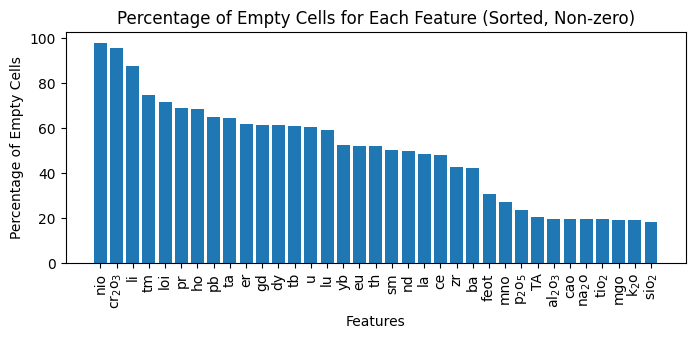

In [ ]:
import re
#Filter base on empty cells
empty_percentages = (df.drop('sample_id', axis=1).isnull().sum() / len(df)) * 100

# Sorting the features by percentage of empty cells in descending order
sorted_features = empty_percentages.sort_values(ascending=False)

# Removing features with 0% empty cells
sorted_features = sorted_features[sorted_features > 0]

# Format the features with numbers as subscripts
formatted_features = []
for feature in sorted_features.index:
    formatted_feature = re.sub(r'(\d+)', r'$_{\1}$', feature)
    formatted_features.append(formatted_feature)

# # Plotting the histogram
plt.figure(figsize=(8, 3))
plt.bar(formatted_features, sorted_features.values)
plt.xlabel('Features')
plt.ylabel('Percentage of Empty Cells')
plt.title('Percentage of Empty Cells for Each Feature (Sorted, Non-zero)')
plt.xticks(rotation=90)
plt.show()

#Sparsity pattern plots

Sparsity pattern plots are essential in data analysis for identifying the distribution and prevalence of non-zero values in a dataset. They provide immediate visual feedback on data density and potential patterns, which is critical for understanding the dataset's structure. These plots also highlight areas with missing information, guiding the data cleaning and preprocessing steps. By revealing the extent of sparsity, they help in determining the suitability of various machine learning algorithms, as some algorithms may perform poorly with sparse data. Thus, sparsity pattern plots are a valuable tool for improving data quality and preparing datasets for effective machine learning model building.

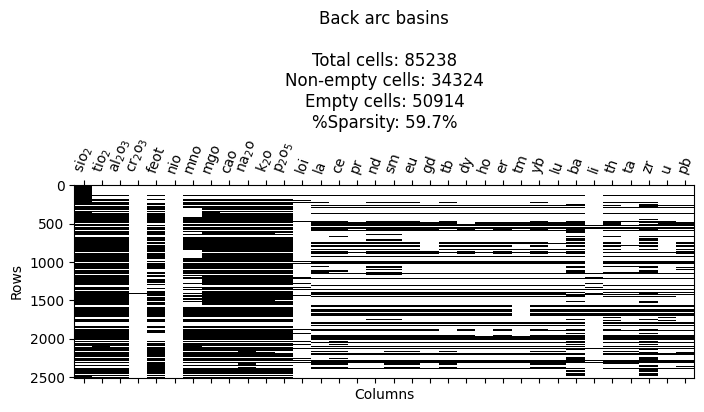

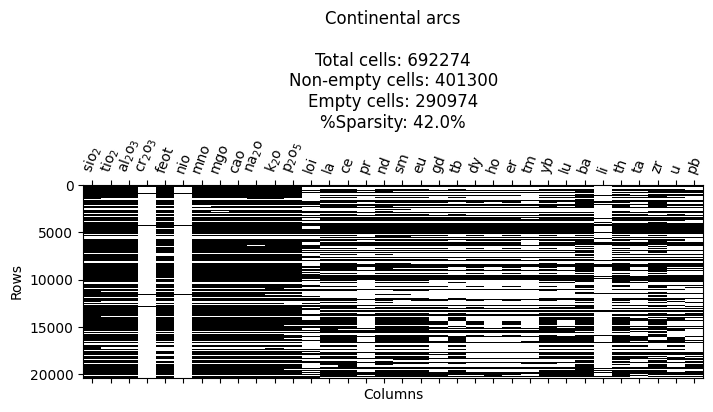

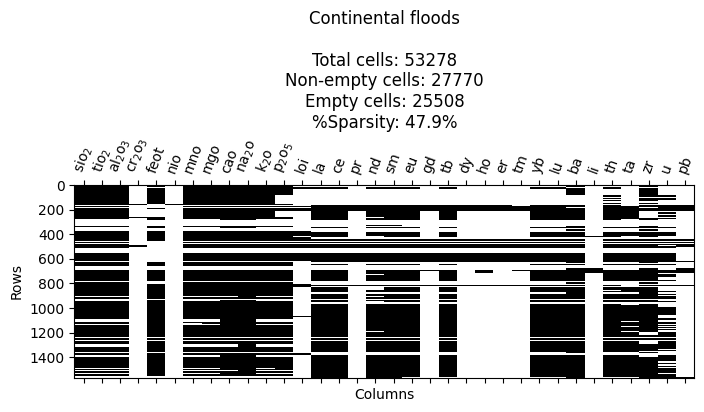

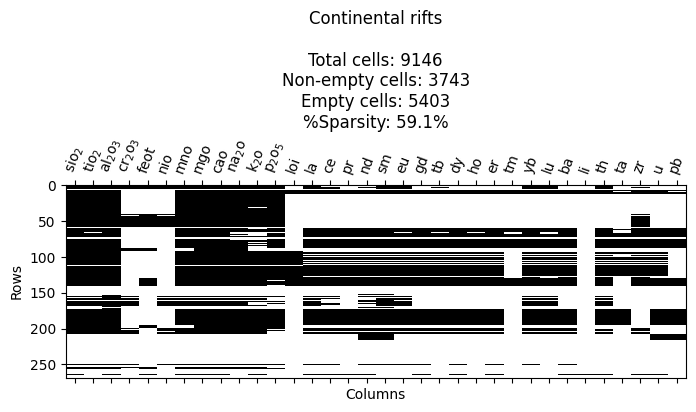

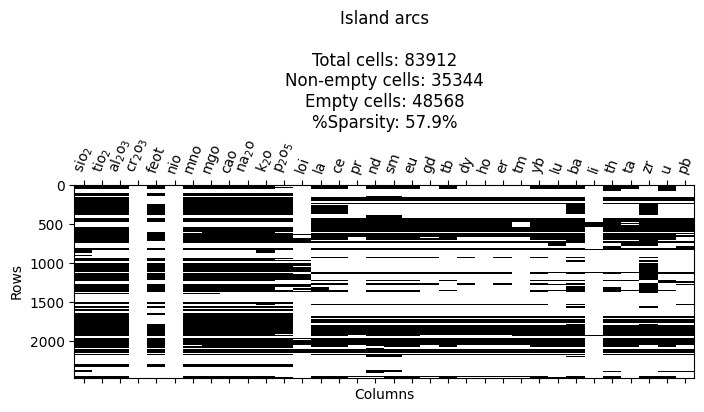

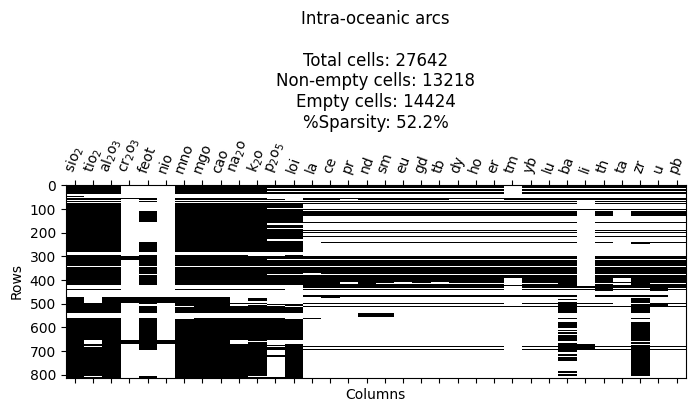

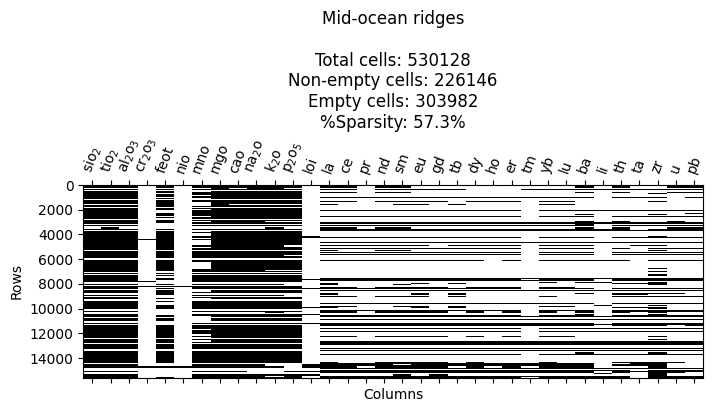

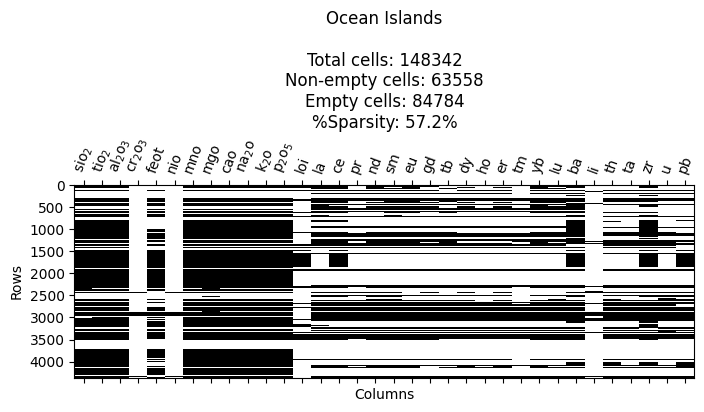

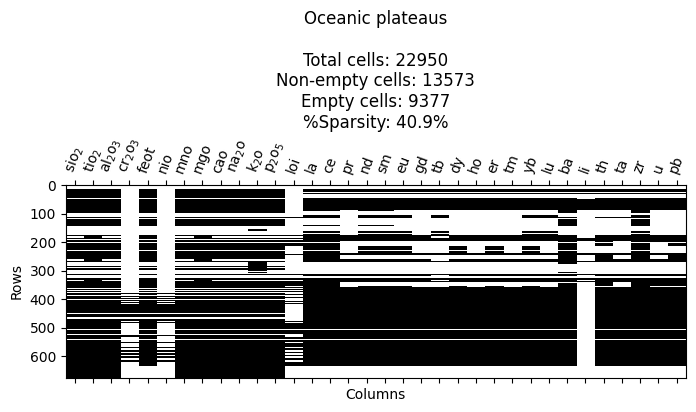

In [ ]:
targets = df["level3"].unique()

for target in targets:
    title = str(target)
    df2 = df.loc[df["level3"] == target]
    df2 = df2.select_dtypes(include=['float']).fillna(0)
    df2 = df2.drop(columns=['latitude', 'longitude', 'TA'])  # Remove the specified columns
    my_ticks = list(range(len(df2.columns)))
    my_ticklabels = list(df2.columns)
    matrix = df2.values
    non_empty_cells = np.count_nonzero(matrix)
    empty_cells = matrix.size - non_empty_cells
    sparsity = round(empty_cells / matrix.size * 100, 1)

    fig = plt.figure(figsize=(8, 2.5))
    ax = fig.add_subplot(111)
    plt.spy(matrix)
    ax.set_aspect('auto')

    # Format the x-tick labels with numbers as subscripts
    formatted_ticklabels = []
    for ticklabel in my_ticklabels:
        formatted_ticklabel = re.sub(r'(\d+)', r'$_{\1}$', ticklabel)
        formatted_ticklabels.append(formatted_ticklabel)

    plt.xticks(my_ticks, formatted_ticklabels, rotation=70)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    ax.set_title(f"{title}\n\nTotal cells: {matrix.size}\nNon-empty cells: {non_empty_cells}\nEmpty cells: {empty_cells}\n%Sparsity: {sparsity}%")
    plt.show()

In [ ]:
%%time
import numpy as np
from tqdm import tqdm

df_cleaned = df.copy()
targets = df_cleaned["level3"].unique()

# Create a progress bar
progress_bar = tqdm(targets, desc='Cleaning Data')

for target in progress_bar:
    df3 = df_cleaned.loc[df_cleaned["level3"] == target]

    # Iterate over each feature
    for feature in df3.columns:
        # Check if the feature is of float type
        if df3[feature].dtype == np.float64:
            # Calculate mean and standard deviation for the feature
            feature_mean = df3[feature].mean()
            feature_std = df3[feature].std()

            # Calculate the lower and upper bounds for the feature
            lower_bound = feature_mean - 2 * feature_std
            upper_bound = feature_mean + 2 * feature_std

            # Remove values below and above the bounds
            df3.loc[(df3[feature] < lower_bound) | (df3[feature] > upper_bound), feature] = np.nan

    df_cleaned.loc[df_cleaned["level3"] == target] = df3

df_cleaned_all = df_cleaned.copy()

Cleaning Data: 100%|██████████| 9/9 [00:00<00:00,  9.11it/s]

CPU times: user 663 ms, sys: 1.37 ms, total: 665 ms
Wall time: 1.08 s


In [ ]:
# Assuming 'df_cleaned_all' is a pandas DataFrame with the mentioned columns to be removed.

# List of columns to be removed
columns_to_remove = ['index', 'sample_id', 'references', 'latitude', 'longitude', 'tectonic_setting', 'rock_name', 'level1', 'level2', 'TA']

# Remove the specified columns from the DataFrame
df_cleaned_all_dropped = df_cleaned_all.drop(columns=columns_to_remove, errors='ignore')

labels = {
      "Back arc basins": 1,
      "Continental arcs": 2,
      "Continental floods": 3,
      "Continental rifts": 4,
      "Island arcs": 5,
      "Intra-oceanic arcs": 6,
      "Mid-ocean ridges": 7,
      "Ocean Islands": 8,
      "Oceanic plateaus": 9,
  }

df_cleaned_all_dropped["level3"] = df_cleaned_all_dropped["level3"].map(labels).astype(np.int64)

print(df_cleaned_all_dropped['level3'].unique())

df_cleaned_all_dropped.info()



[1 2 3 4 5 6 7 8 9]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48615 entries, 0 to 48614
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sio2    38368 non-null  float64
 1   tio2    37263 non-null  float64
 2   al2o3   37710 non-null  float64
 3   cr2o3   2030 non-null   float64
 4   feot    32550 non-null  float64
 5   nio     995 non-null    float64
 6   mno     35207 non-null  float64
 7   mgo     38262 non-null  float64
 8   cao     37936 non-null  float64
 9   na2o    37089 non-null  float64
 10  k2o     38340 non-null  float64
 11  p2o5    36146 non-null  float64
 12  loi     13342 non-null  float64
 13  la      24544 non-null  float64
 14  ce      24680 non-null  float64
 15  pr      14717 non-null  float64
 16  nd      23873 non-null  float64
 17  sm      23836 non-null  float64
 18  eu      22954 non-null  float64
 19  gd      18458 non-null  float64
 20  tb      18702 non-null  float64
 21  dy      18350 n

#Data Imputation
Data imputation is a technique used to handle missing values in datasets. It involves substituting the missing or null data points with substituted values, allowing for the continued use of the dataset for analysis without simply discarding incomplete records.

Iterative imputation is a specific method of imputation that models each feature with missing values as a function of other features in a round-robin fashion. It's a type of multivariate imputation that estimates the missing values within each feature by treating it as a target variable in a regression, with the other features as predictors. Here's how iterative imputation generally works:

1. Initially, all missing values are filled with some initial guess, which could be mean, median, or mode of the column.
2. The imputer then models each feature with missing values as a dependent variable, using the other features to predict the missing values.
3. This is done in a round-robin or cyclic order, where each feature is imputed in turn and used as a predictor for the next feature to be imputed.
4. The process iterates over the dataset multiple times until the change in imputed values converges or until a maximum number of iterations is reached.

Using the `IterativeImputer` from scikit-learn, the process can be fine-tuned with parameters like `max_iter` to set the maximum number of imputation iterations, `random_state` for reproducibility of results, and `min_value` or `max_value` to constrain imputed values. After imputation, the data is often more suitable for analysis, as it no longer contains gaps that could skew the results or prevent certain types of computations.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from tqdm import tqdm
import pandas as pd
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Initialize the imputer
imputer = IterativeImputer(max_iter=10, random_state=0, min_value=0)

# A list to hold imputed DataFrames
dfs_imputed = []

# Use tqdm to create a progress bar for the loop
for level in tqdm(df_cleaned_all_dropped['level3'].unique(), desc='Imputing'):
    # Create a df for the current level
    df = df_cleaned_all_dropped[df_cleaned_all_dropped['level3'] == level].copy()

    # Select only float columns and identify columns with all NaN values
    df_float = df.select_dtypes(include=['float'])
    columns_with_all_nan = df_float.columns[df_float.isna().all()].tolist()

    # If there are columns with all NaN, replace NaNs with a placeholder
    if columns_with_all_nan:
        df_float[columns_with_all_nan] = df_float[columns_with_all_nan].fillna(-1)

    # Apply imputation
    df_imputed_array = imputer.fit_transform(df_float)
    df_imputed = pd.DataFrame(df_imputed_array, columns=df_float.columns)

    # Replace placeholder with NaN for columns that were entirely NaN
    for col in columns_with_all_nan:
        df_imputed[col] = df_imputed[col].replace(-1, np.nan)

    # Add the imputed df to the list
    dfs_imputed.append(df_imputed)

# Concatenate all imputed dfs
df_final = pd.concat(dfs_imputed, ignore_index=True)

Imputing: 100%|██████████| 9/9 [01:03<00:00,  7.09s/it]


In [ ]:
columns_to_add = ['level3']
columns_to_add_df = df_cleaned_all_dropped[columns_to_add]
df_final_for_machine_learning = columns_to_add_df.join(df_final)
df_final_for_machine_learning["level3"] = df_final_for_machine_learning["level3"].astype('int64')

df_final_for_machine_learning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48615 entries, 0 to 48614
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   level3  48615 non-null  int64  
 1   sio2    48615 non-null  float64
 2   tio2    48615 non-null  float64
 3   al2o3   48615 non-null  float64
 4   cr2o3   46147 non-null  float64
 5   feot    48615 non-null  float64
 6   nio     43640 non-null  float64
 7   mno     48615 non-null  float64
 8   mgo     48615 non-null  float64
 9   cao     48615 non-null  float64
 10  na2o    48615 non-null  float64
 11  k2o     48615 non-null  float64
 12  p2o5    48615 non-null  float64
 13  loi     48615 non-null  float64
 14  la      48615 non-null  float64
 15  ce      48615 non-null  float64
 16  pr      48615 non-null  float64
 17  nd      48615 non-null  float64
 18  sm      48615 non-null  float64
 19  eu      48615 non-null  float64
 20  gd      48615 non-null  float64
 21  tb      48615 non-null  float64
 22

#Random Forrest classification

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2021
           2       0.99      1.00      0.99     16249
           3       1.00      0.98      0.99      1268
           4       1.00      0.91      0.95       211
           5       0.99      0.98      0.99      1952
           6       1.00      0.96      0.98       635
           7       0.99      1.00      1.00     12548
           8       1.00      0.99      1.00      3474
           9       0.97      0.87      0.92       534

    accuracy                           0.99     38892
   macro avg       0.99      0.96      0.98     38892
weighted avg       0.99      0.99      0.99     38892



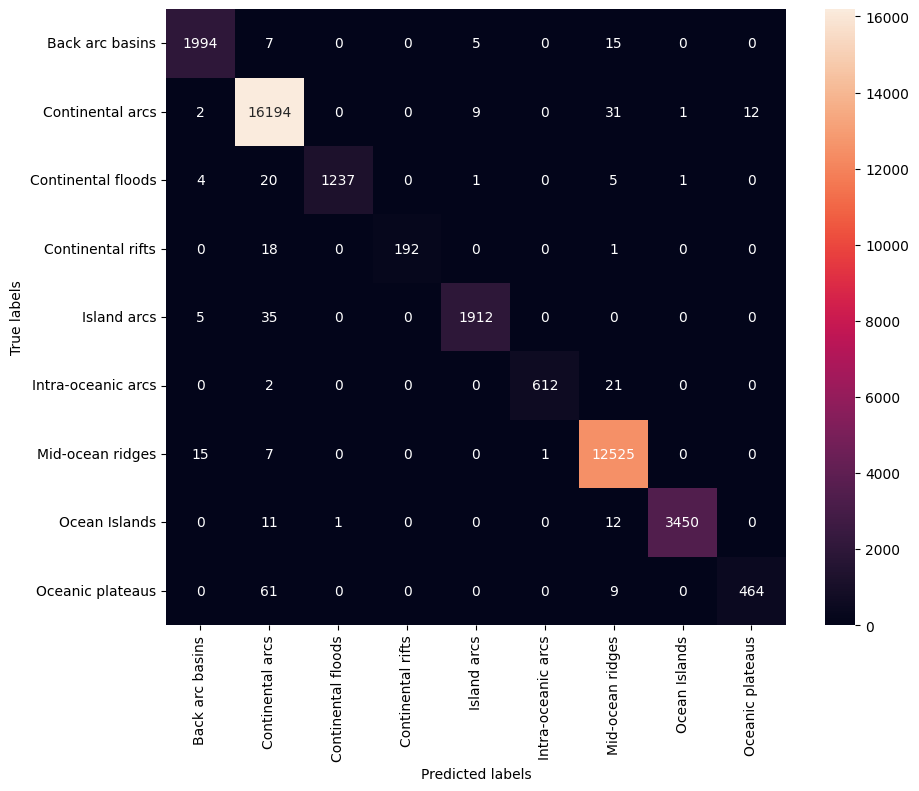

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df_final_for_machine_learning.fillna(0, inplace=True)

# Assuming df_final_for_machine_learning is already loaded and preprocessed
# Separate the features and the target variable
X = df_final_for_machine_learning.drop('level3', axis=1)
y = df_final_for_machine_learning['level3']

scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=0)

# Initialize the classifier
classifier = RandomForestClassifier(random_state=0, verbose=1)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Assuming 'cm' is the confusion matrix obtained from the model predictions
# and 'y_test' are the true labels of the test set.

# Define the mapping of numeric labels to actual category names
label_mapping = {
    1: "Back arc basins",
    2: "Continental arcs",
    3: "Continental floods",
    4: "Continental rifts",
    5: "Island arcs",
    6: "Intra-oceanic arcs",
    7: "Mid-ocean ridges",
    8: "Ocean Islands",
    9: "Oceanic plateaus"
}

# Map the actual names to the confusion matrix ticks
tick_marks = [label_mapping[i] if i in label_mapping else i for i in range(1, len(np.unique(y_test)) + 1)]

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=tick_marks, yticklabels=tick_marks)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


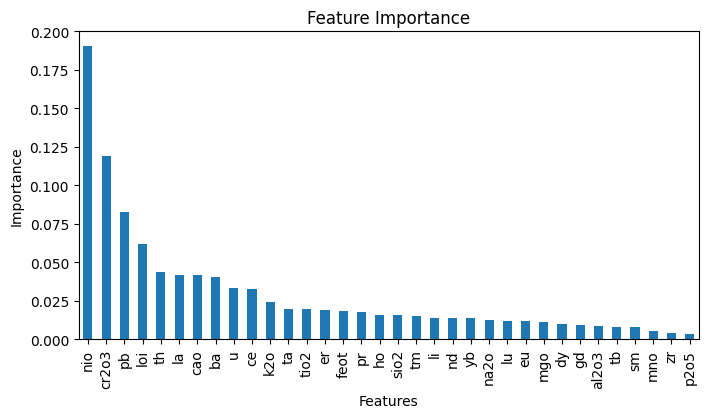

In [ ]:
# The code environment has been reset, which means we need to redefine any imports and mock data.
# However, for the purpose of demonstrating how to plot feature importance, I'll assume that the classifier and the feature names are already available.

# Assuming 'classifier' is the trained RandomForestClassifier and 'X.columns' are the feature names

# Get feature importances from the classifier
feature_importances = classifier.feature_importances_

# Create a pandas series with feature names and their importance
importances = pd.Series(feature_importances, index=X.columns)

# Sort the feature importances in descending order
sorted_importances = importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 4))
sorted_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

